In [7]:
# IMDBをカレントフォルダにダウンロード
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

--2020-10-01 09:34:54--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
ai.stanford.edu (ai.stanford.edu) をDNSに問いあわせています... 171.64.68.10
ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 84125825 (80M) [application/x-gzip]
`aclImdb_v1.tar.gz' に保存中

aclImdb_v1.tar.gz   100%[===================>]  80.23M  4.66MB/s 時間 21s        

2020-10-01 09:35:15 (3.87 MB/s) - `aclImdb_v1.tar.gz' へ保存完了 [84125825/84125825]



In [ ]:
# 解凍
!tar zxf aclImdb_v1.tar.gz

In [1]:
# aclImdb/train/unsupはラベル無しのため削除
!rm -rf aclImdb/train/unsup

In [2]:
# IMDBデータセットの説明を表示
!cat aclImdb/README

Large Movie Review Dataset v1.0

Overview

This dataset contains movie reviews along with their associated binary
sentiment polarity labels. It is intended to serve as a benchmark for
sentiment classification. This document outlines how the dataset was
gathered, and how to use the files provided. 

Dataset 

The core dataset contains 50,000 reviews split evenly into 25k train
and 25k test sets. The overall distribution of labels is balanced (25k
pos and 25k neg). We also include an additional 50,000 unlabeled
documents for unsupervised learning. 

In the entire collection, no more than 30 reviews are allowed for any
given movie because reviews for the same movie tend to have correlated
ratings. Further, the train and test sets contain a disjoint set of
movies, so no significant performance is obtained by memorizing
movie-unique terms and their associated with observed labels.  In the
labeled train/test sets, a negative review has a score <= 4 out of 10,
and a positive review has a scor

概要

このデータセットには、映画のレビューとそれに関連するバイナリが含まれています。
センチメントの極性ラベル。のベンチマークとして機能することを目的としています。
センチメント分類。この文書では、データセットがどのようにして
集められたファイルと、提供されたファイルの使用方法を説明します。

データセット 

コアデータセットには50,000件のレビューが含まれており、25,000件の列車に均等に分割されています。
と25kのテストセットがあります。ラベルの全体的な分布はバランスが取れています（25k
posと25k neg)。さらに、50,000個のラベルなしの
文書を教師なし学習のために使用します．

コレクション全体では，いずれかの
なぜなら、同じ映画のレビューは相関性があるからです。
評価を行います。さらに、訓練セットとテストセットには、不連続な
ムービーを記憶しても大きなパフォーマンスは得られません。
ムービーユニーク用語と観測されたラベルに関連付けられている。 の中では
ラベル付けされた列車/テストセットでは、ネガティブなレビューは10点満点中4点未満となります。
と肯定的なレビューは10点満点中7点以上のスコアを持っています。このように
より多くの中立的な評価は、列車/テストセットには含まれていません。の中では
監視されていないセット、任意の評価のレビューが含まれており、そこには
偶数のレビュー > 5 と <= 5。

ファイル

に対応する 2 つのトップレベルディレクトリ [train/, test/] があります。
学習セットとテストセットがあります．それぞれには，[pos/, neg/] ディレクトリが含まれています．
レビューをポジティブとネガティブの二値ラベルで表示します。これらの中で
ディレクトリに保存されます。
規約[[id]_[レーティング].txt]で、[id]は一意のID、[レーティング]は
は、そのレビューの星の評価を 1-10 のスケールで表示します。例えば、ファイルの
test/pos/200_8.txt]は、陽性ラベルを付けたテストセットのテキストです。
IMDbからユニークなID 200と星の評価8/10の例。固有ID200の
train/unsup/] ディレクトリでは、レーティングが
データセットのこの部分では省略されています。

また、各レビューのIMDbのURLを別の
urls_[pos, neg, unsup].txt]ファイルです。一意なID 200のレビューは
のURLはこのファイルの200行目にあります。刻々と変化する IMDb のため、私たちは
はレビューに直接リンクすることができず、映画の
のレビューページを参照してください。

レビューテキストファイルに加えて、既にトークン化されたバッグ
of words (BoW)特徴量を用いて実験を行った。これらの 
は、train/test ディレクトリの .feat ファイルに格納されています。それぞれの.feat
ファイルは LIBSVM フォーマットで、ラベル付き
データを使用しています。 これらのファイルの特徴インデックスは 0 から始まり、テキスト
特徴インデックスに対応するトークンは [imdb.vocab] にあります。ということは
.featファイルの0:7の行は、[imdb.vocab]の最初の単語を意味します。
(the)はそのレビューで7回登場しています。

.featファイル形式の詳細についてはLIBSVMのページを参照してください。
http://www.csie.ntu.edu.tw/~cjlin/libsvm/

の予想視聴率を収録した[imdbEr.txt]も収録しています。
(Potts, 2011)によって計算されたように、[imdb.vocab]の各トークンの 期待される
レーティングは言葉の平均的な極性を知るための良い方法です。
をデータセットの中で使用しています。

データセットを引用する

このデータセットを使用する際には、我々のACL 2011の論文を引用してください。
を紹介しています。また，本論文では，以下のような分類結果も掲載しています．
と比較してみてはいかがでしょうか。


In [3]:
from sklearn.datasets import load_files

train_review = load_files('./aclImdb/train/', encoding='utf-8')
x_train, y_train = train_review.data, train_review.target

test_review = load_files('./aclImdb/test/', encoding='utf-8')
x_test, y_test = test_review.data, test_review.target

# ラベルの0,1と意味の対応の表示
print(train_review.target_names)

['neg', 'pos']


In [4]:
print("x : {}".format(x_train[0]))

x : Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty.


### 【問題1】BoWのスクラッチ実装

以下の3文のBoWを求められるプログラムをscikit-learnを使わずに作成してください。1-gramと2-gramで計算してください。


- This movie is SOOOO funny!!!
- What a movie! I never
- best movie ever!!!!! this movie

In [80]:
import numpy as np
import pandas as pd

from collections import Counter

import pprint

In [81]:
mini_dataset =  ["This movie is SOOOO funny!!!", "What a movie! I never",  "best movie ever!!!!! this movie"]

In [82]:
preprocessed_dataset = []
for data in mini_dataset:
    preprocessed_dataset.append(data.split(' '))
print(preprocessed_dataset)

[['This', 'movie', 'is', 'SOOOO', 'funny!!!'], ['What', 'a', 'movie!', 'I', 'never'], ['best', 'movie', 'ever!!!!!', 'this', 'movie']]


- __1-gram__

In [83]:
frequency_list = []
for data in preprocessed_dataset:
    frequency_list.append(Counter(data))
    
pprint.pprint(frequency_list)

[Counter({'This': 1, 'movie': 1, 'is': 1, 'SOOOO': 1, 'funny!!!': 1}),
 Counter({'What': 1, 'a': 1, 'movie!': 1, 'I': 1, 'never': 1}),
 Counter({'movie': 2, 'best': 1, 'ever!!!!!': 1, 'this': 1})]


In [84]:
to_dataframe = dict()
for index, value in zip(mini_dataset, frequency_list):
    to_dataframe[index] = dict(value)
    
pprint.pprint(to_dataframe)

{'This movie is SOOOO funny!!!': {'SOOOO': 1,
                                  'This': 1,
                                  'funny!!!': 1,
                                  'is': 1,
                                  'movie': 1},
 'What a movie! I never': {'I': 1, 'What': 1, 'a': 1, 'movie!': 1, 'never': 1},
 'best movie ever!!!!! this movie': {'best': 1,
                                     'ever!!!!!': 1,
                                     'movie': 2,
                                     'this': 1}}


In [85]:
df_1gram = pd.DataFrame.from_dict(to_dataframe, orient='index').sort_index()
df_1gram = df_1gram.fillna(0).astype('int')

df_1gram

,This,movie,is,SOOOO,funny!!!,What,a,movie!,I,never,best,ever!!!!!,this
This movie is SOOOO funny!!!,1,1,1,1,1,0,0,0,0,0,0,0,0
What a movie! I never,0,0,0,0,0,1,1,1,1,1,0,0,0
best movie ever!!!!! this movie,0,2,0,0,0,0,0,0,0,0,1,1,1


- __2-gram__

In [86]:
to_frequency_counter = list()
for data in preprocessed_dataset:
    temp_to_list = list()
    for index in range(len(data) -2 +1):
        temp_data = data[index : index + 2]
        temp_two_words = temp_data[0] + " " + temp_data[1]
        temp_to_list.append(temp_two_words)
    
    to_frequency_counter.append(temp_to_list)

In [87]:
to_frequency_counter

[['This movie', 'movie is', 'is SOOOO', 'SOOOO funny!!!'],
 ['What a', 'a movie!', 'movie! I', 'I never'],
 ['best movie', 'movie ever!!!!!', 'ever!!!!! this', 'this movie']]

In [88]:
frequency_list = []
for data in to_frequency_counter:
    frequency_list.append(Counter(data))
    
pprint.pprint(frequency_list)

[Counter({'This movie': 1, 'movie is': 1, 'is SOOOO': 1, 'SOOOO funny!!!': 1}),
 Counter({'What a': 1, 'a movie!': 1, 'movie! I': 1, 'I never': 1}),
 Counter({'best movie': 1,
          'movie ever!!!!!': 1,
          'ever!!!!! this': 1,
          'this movie': 1})]


In [89]:
to_dataframe = dict()
for index, value in zip(mini_dataset, frequency_list):
    to_dataframe[index] = dict(value)
    
pprint.pprint(to_dataframe)

{'This movie is SOOOO funny!!!': {'SOOOO funny!!!': 1,
                                  'This movie': 1,
                                  'is SOOOO': 1,
                                  'movie is': 1},
 'What a movie! I never': {'I never': 1,
                           'What a': 1,
                           'a movie!': 1,
                           'movie! I': 1},
 'best movie ever!!!!! this movie': {'best movie': 1,
                                     'ever!!!!! this': 1,
                                     'movie ever!!!!!': 1,
                                     'this movie': 1}}


In [90]:
df_2gram = pd.DataFrame.from_dict(to_dataframe, orient='index').sort_index()
df_2gram = df_2gram.fillna(0).astype('int')

df_2gram

,This movie,movie is,is SOOOO,SOOOO funny!!!,What a,a movie!,movie! I,I never,best movie,movie ever!!!!!,ever!!!!! this,this movie
This movie is SOOOO funny!!!,1,1,1,1,0,0,0,0,0,0,0,0
What a movie! I never,0,0,0,0,1,1,1,1,0,0,0,0
best movie ever!!!!! this movie,0,0,0,0,0,0,0,0,1,1,1,1


### 【問題2】TF-IDFの計算

IMDB映画レビューデータセットをTF-IDFによりベクトル化してください。NLTKのストップワードを利用し、最大の語彙数は5000程度に設定してください。テキストクリーニングやステミングなどの前処理はこの問題では要求しません。


TF-IDFの計算にはscikit-learnの以下のどちらかのクラスを使用してください。


[sklearn.feature_extraction.text.TfidfVectorizer — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

[sklearn.feature_extraction.text.TfidfTransformer — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html)

In [93]:
import nltk
stop_words = nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print("stop word : {}".format(stop_words))

stop word : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/takahiromotoki/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer

- 1-gram, 最大語彙数:5000, 全ストップワード

In [157]:
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=5000)

x_train_1gram = vectorizer.fit_transform(x_train)
x_test_1gram = vectorizer.fit_transform(x_test)

In [158]:
print(vectorizer.get_feature_names()[:100])
print("\n")
print(x_train_1gram.shape, x_test_1gram.shape)
print("\n")
print(x_train_1gram[0, 0:500])

['00', '000', '10', '100', '11', '12', '13', '13th', '14', '15', '16', '17', '18', '1930', '1940', '1940s', '1950', '1950s', '1960', '1960s', '1968', '1970', '1970s', '1971', '1972', '1979', '1980', '1980s', '1981', '1982', '1990', '1995', '1997', '1998', '1999', '19th', '1st', '20', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '20th', '23', '24', '25', '2nd', '30', '3000', '35', '3rd', '40', '45', '50', '50s', '60', '60s', '70', '70s', '80', '80s', '90', '90s', '95', '99', 'aaron', 'abandoned', 'abc', 'abilities', 'ability', 'able', 'aboard', 'absence', 'absent', 'absolute', 'absolutely', 'absurd', 'abuse', 'abused', 'abysmal', 'academy', 'accent', 'accents', 'accept', 'acceptable', 'accepted', 'accident', 'accidentally', 'accompanied', 'accomplished', 'according', 'account', 'accurate', 'accurately', 'accused', 'achieve']


(25000, 5000) (25000, 5000)


  (0, 267)	0.08381220735492088
  (0, 201)	0.08282260831175318
  (0, 475)	0.13734353234274008
  (0, 111)	0.1400722

- 2-gram, 最大語彙数:5000, 全ストップワード

In [159]:
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=5000, ngram_range = (2, 2))

x_train_2gram = vectorizer.fit_transform(x_train)
x_test_2gram = vectorizer.fit_transform(x_test)

In [160]:
print(x_train_2gram.shape, x_test_2gram.shape)
print("\n")
print(x_train_2gram[0, 0:500])

(25000, 5000) (25000, 5000)


  (0, 418)	0.24948479772013363


- 1-gram, 最大語彙数:1000, 全ストップワード

In [161]:
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=1000)

x_train_1gram_features = vectorizer.fit_transform(x_train)
x_test_1gram_features = vectorizer.fit_transform(x_test)

In [162]:
print(x_train_1gram_features.shape, x_test_1gram_features.shape)
print("\n")
print(x_train_1gram_features[0, 0:500])

(25000, 1000) (25000, 1000)


  (0, 43)	0.14077780520698466
  (0, 26)	0.13911559410756655
  (0, 302)	0.2816563515587199
  (0, 362)	0.13979900996516081
  (0, 319)	0.13597214591742793
  (0, 85)	0.2306933757359183
  (0, 14)	0.12584876885323995
  (0, 368)	0.16004244500207904
  (0, 101)	0.26326490402478975
  (0, 161)	0.2125088870952694
  (0, 202)	0.1984760153439908
  (0, 86)	0.18976889886471296
  (0, 100)	0.2123307784669702
  (0, 269)	0.08963869263647614
  (0, 483)	0.19689658338015378
  (0, 195)	0.1463229475450414


- 1-gram, 最大語彙数:5000, ストップワード:無し

In [191]:
vectorizer = TfidfVectorizer(stop_words=None, max_features=5000)

x_train_1gram_stopwords = vectorizer.fit_transform(x_train)
x_test_1gram_stopwords = vectorizer.fit_transform(x_test)

In [192]:
print(x_train_1gram_stopwords.shape, x_test_1gram_stopwords.shape)
print("\n")
print(x_train_1gram_stopwords[0, 0:500])

(25000, 5000) (25000, 5000)


  (0, 293)	0.03679449748819134
  (0, 268)	0.07605535650029367
  (0, 200)	0.07515734521535346
  (0, 483)	0.12463233751978506
  (0, 107)	0.12710849062911136
  (0, 110)	0.06798992899614642
  (0, 233)	0.0479569933322464
  (0, 458)	0.12070301324957379
  (0, 487)	0.10252284608787063
  (0, 428)	0.03640421567456567


### 【問題3】TF-IDFを用いた学習 

問題2で求めたベクトルを用いてIMDB映画レビューデータセットの学習・推定を行なってください。

モデルは2値分類が行える任意のものを利用してください。


ここでは精度の高さは求めませんが、最大の語彙数やストップワード、n-gramの数を変化させて影響を検証してみてください。

In [175]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix

- 1-gram, 最大語彙数:5000, 全ストップワード

In [176]:
clf_lr_1gram = LogisticRegression(solver="lbfgs")

In [177]:
clf_lr_1gram.fit(x_train_1gram, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [178]:
y_pred_1gram = clf_lr_1gram.predict(x_test_1gram)

In [179]:
print(classification_report(y_test, y_pred_1gram))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56     12500
           1       0.56      0.55      0.56     12500

    accuracy                           0.56     25000
   macro avg       0.56      0.56      0.56     25000
weighted avg       0.56      0.56      0.56     25000



- 2-gram, 最大語彙数:5000, 全ストップワード

In [180]:
clf_lr_2gram = LogisticRegression(solver="lbfgs")

In [181]:
clf_lr_2gram.fit(x_train_2gram, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [182]:
y_pred_2gram = clf_lr_2gram.predict(x_test_2gram)

In [183]:
print(classification_report(y_test, y_pred_2gram))

              precision    recall  f1-score   support

           0       0.56      0.57      0.57     12500
           1       0.57      0.56      0.56     12500

    accuracy                           0.56     25000
   macro avg       0.56      0.56      0.56     25000
weighted avg       0.56      0.56      0.56     25000



- 1-gram, 最大語彙数:1000, 全ストップワード

In [184]:
clf_lr_1gram_features = LogisticRegression(solver="lbfgs")

In [185]:
clf_lr_1gram_features.fit(x_train_1gram_features, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [186]:
y_pred_1gram_features = clf_lr_1gram_features.predict(x_test_1gram_features)

In [187]:
print(classification_report(y_test, y_pred_1gram_features))

              precision    recall  f1-score   support

           0       0.53      0.62      0.57     12500
           1       0.54      0.46      0.50     12500

    accuracy                           0.54     25000
   macro avg       0.54      0.54      0.53     25000
weighted avg       0.54      0.54      0.53     25000



- 1-gram, 最大語彙数:5000, ストップワード:無し

In [193]:
clf_lr_1gram_stopwords = LogisticRegression(solver="lbfgs")

In [194]:
clf_lr_1gram_stopwords.fit(x_train_1gram_stopwords, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [195]:
y_pred_1gram_stopwords = clf_lr_1gram_stopwords.predict(x_test_1gram_stopwords)

In [196]:
print(classification_report(y_test, y_pred_1gram_stopwords))

              precision    recall  f1-score   support

           0       0.59      0.74      0.65     12500
           1       0.65      0.48      0.55     12500

    accuracy                           0.61     25000
   macro avg       0.62      0.61      0.60     25000
weighted avg       0.62      0.61      0.60     25000



### 【問題4】TF-IDFのスクラッチ実装 

以下の3文のTF-IDFを求められるプログラムをscikit-learnを使わずに作成してください。

標準的な式と、scikit-learnの採用している式の2種類を作成してください。正規化は不要です。


- This movie is SOOOO funny!!!
- What a movie! I never
- best movie ever!!!!! this movie

参考kaggleノートブック：[Creating TF-IDF Model from Scratch](https://www.kaggle.com/yassinehamdaoui1/creating-tf-idf-model-from-scratch)

- 標準的なTF-IDFの式

In [468]:
first_sentence = "This movie is SOOOO funny!!!"
second_sentence = "What a movie! I never"
third_sentence = "best movie ever!!!!! this movie"

#split so each word have their own string
first_sentence = first_sentence.lower().replace("!", "").strip().split(" ")
second_sentence = second_sentence.lower().replace("!", "").strip().split(" ")
third_sentence = third_sentence.lower().replace("!", "").strip().split(" ")

#join them to remove common duplicate words
total= set(first_sentence).union(set(second_sentence)).union(set(third_sentence))
print(total)

{'movie', 'is', 'funny', 'what', 'a', 'soooo', 'i', 'ever', 'best', 'never', 'this'}


In [469]:
wordDictA = dict.fromkeys(total, 0) 
wordDictB = dict.fromkeys(total, 0)
wordDictC = dict.fromkeys(total, 0)

for word in first_sentence:
    wordDictA[word]+=1
    
for word in second_sentence:
    wordDictB[word]+=1
    
for word in third_sentence:
    wordDictC[word]+=1

In [470]:
frequency_df = pd.DataFrame([wordDictA, wordDictB, wordDictC])
frequency_df

,movie,is,funny,what,a,soooo,i,ever,best,never,this
0,1,1,1,0,0,1,0,0,0,0,1
1,1,0,0,1,1,0,1,0,0,1,0
2,2,0,0,0,0,0,0,1,1,0,1


In [471]:
def computeTF(wordDict, doc):
    tfDict = {}
    corpusCount = len(doc)
    for word, count in wordDict.items():
        tfDict[word] = count/float(corpusCount)
    return(tfDict)
#running our sentences through the tf function:
tfFirst = computeTF(wordDictA, first_sentence)
tfSecond = computeTF(wordDictB, second_sentence)
tfThird = computeTF(wordDictC, third_sentence)

#Converting to dataframe for visualization
tf = pd.DataFrame([tfFirst, tfSecond, tfThird])
tf

,movie,is,funny,what,a,soooo,i,ever,best,never,this
0,0.2,0.2,0.2,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.2
1,0.2,0.0,0.0,0.2,0.2,0.0,0.2,0.0,0.0,0.2,0.0
2,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.2,0.0,0.2


In [472]:
def computeIDF(docList):
    idfDict = {}
    N = len(docList)

    idfDict = dict.fromkeys(docList[0].keys(), 0)
    for word, val in idfDict.items():
        idfDict[word] = np.log(N / (frequency_df[word].sum()))
        
    return(idfDict)

#inputing our sentences in the log file
idfs = computeIDF([wordDictA, wordDictB, wordDictC])
idfs

{'movie': -0.2876820724517809,
 'is': 1.0986122886681098,
 'funny': 1.0986122886681098,
 'what': 1.0986122886681098,
 'a': 1.0986122886681098,
 'soooo': 1.0986122886681098,
 'i': 1.0986122886681098,
 'ever': 1.0986122886681098,
 'best': 1.0986122886681098,
 'never': 1.0986122886681098,
 'this': 0.4054651081081644}

In [473]:
def computeTFIDF(tfBow, idfs):
    tfidf = {}
    for word, val in tfBow.items():
        tfidf[word] = val*idfs[word]
    return(tfidf)

#running our two sentences through the IDF:
idfFirst = computeTFIDF(tfFirst, idfs)
idfSecond = computeTFIDF(tfSecond, idfs)
idfThird = computeTFIDF(tfThird, idfs)

#putting it in a dataframe
tf_idf = pd.DataFrame([idfFirst, idfSecond, idfThird])
tf_idf

,movie,is,funny,what,a,soooo,i,ever,best,never,this
0,-0.057536,0.219722,0.219722,0.000000,0.000000,0.219722,0.000000,0.000000,0.000000,0.000000,0.081093
1,-0.057536,0.000000,0.000000,0.219722,0.219722,0.000000,0.219722,0.000000,0.000000,0.219722,0.000000
2,-0.115073,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.219722,0.219722,0.000000,0.081093


- scikit-learnの式

In [474]:
def computeIDF(docList):
    idfDict = {}
    N = len(docList)

    idfDict = dict.fromkeys(docList[0].keys(), 0)
    for word, val in idfDict.items():
        idfDict[word] = np.log((1 + N) / (frequency_df[word].sum() + 1)) + 1
        
    return(idfDict)
#inputing our sentences in the log file
idfs = computeIDF([wordDictA, wordDictB, wordDictC])
idfs

{'movie': 0.7768564486857903,
 'is': 1.6931471805599454,
 'funny': 1.6931471805599454,
 'what': 1.6931471805599454,
 'a': 1.6931471805599454,
 'soooo': 1.6931471805599454,
 'i': 1.6931471805599454,
 'ever': 1.6931471805599454,
 'best': 1.6931471805599454,
 'never': 1.6931471805599454,
 'this': 1.2876820724517808}

In [475]:
def computeTFIDF(tfBow, idfs):
    tfidf = {}
    for word, val in tfBow.items():
        tfidf[word] = val*idfs[word]
    return(tfidf)

#running our two sentences through the IDF:
idfFirst = computeTFIDF(wordDictA, idfs)
idfSecond = computeTFIDF(wordDictB, idfs)
idfThird = computeTFIDF(wordDictC, idfs)
#putting it in a dataframe
tf_idf = pd.DataFrame([idfFirst, idfSecond, idfThird])
tf_idf

,movie,is,funny,what,a,soooo,i,ever,best,never,this
0,0.776856,1.693147,1.693147,0.000000,0.000000,1.693147,0.000000,0.000000,0.000000,0.000000,1.287682
1,0.776856,0.000000,0.000000,1.693147,1.693147,0.000000,1.693147,0.000000,0.000000,1.693147,0.000000
2,1.553713,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.693147,1.693147,0.000000,1.287682


In [287]:
from gensim.models import Word2Vec
sentences = [['this', 'movie', 'is', 'very', 'good'], ['this', 'film', 'is', 'a', 'good'], ['very', 'bad', 'very', 'very', 'bad']]
model = Word2Vec(min_count=1, size=10) # 次元数を10に設定
model.build_vocab(sentences) # 準備
model.train(sentences, total_examples=model.corpus_count, epochs=model.iter) # 学習
print("語彙の一覧 : {}".format(model.wv.vocab.keys()))
for vocab in model.wv.vocab.keys():
  print("{}のベクトル : \n{}".format(vocab, model.wv[vocab]))

語彙の一覧 : dict_keys(['this', 'movie', 'is', 'very', 'good', 'film', 'a', 'bad'])
thisのベクトル : 
[ 0.04490024 -0.02213435 -0.0218689   0.01280147  0.01727903 -0.04213432
  0.04743863 -0.03321018  0.02952689  0.04063499]
movieのベクトル : 
[-0.03478461 -0.03077289 -0.02795689 -0.00443146 -0.00632171  0.00614787
  0.04722304  0.04706873  0.02717129  0.03652719]
isのベクトル : 
[-0.00414363 -0.00782995 -0.02804689 -0.00589878  0.03851486 -0.0365783
 -0.04637689 -0.02485681 -0.00470399 -0.03171895]
veryのベクトル : 
[-0.0183737  -0.04111299  0.01003001  0.00445909 -0.0094394   0.0407518
  0.01166302  0.00751845  0.03299264  0.00412863]
goodのベクトル : 
[ 0.0290839  -0.0222785   0.03128101  0.00465455  0.00985504 -0.0314997
  0.04443805 -0.03294802  0.02218802 -0.02682054]
filmのベクトル : 
[ 0.02322064 -0.01222273  0.03773014 -0.03526619  0.03218704 -0.04008739
  0.01164205  0.01468769 -0.02396114  0.01799934]
aのベクトル : 
[ 0.01941237  0.0187009  -0.03106834  0.04038012  0.03348972  0.00066411
 -0.04563151  0.04942786 -

/Users/takahiromotoki/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """


In [288]:
model.wv.most_similar(positive="good", topn=3)

[('this', 0.588284432888031),
 ('film', 0.34295129776000977),
 ('very', 0.036548078060150146)]

/Users/takahiromotoki/.pyenv/versions/anaconda3-2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


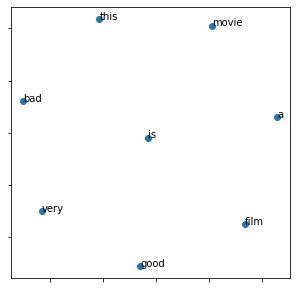

In [290]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
vocabs = model.wv.vocab.keys()
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
vectors_tsne = tsne_model.fit_transform(model[vocabs])
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

### 【問題5】コーパスの前処理

コーパスの前処理として、特殊文字（!など）やURLの除去、大文字の小文字化といったことを行なってください。また、単語（トークン）はリストで分割してください。

Google検索：IMDB Dataset preprocessing kaggle

参考kaggleノートブック：[kernela0bd786339](https://www.kaggle.com/natlee/sentiment-analysis-of-imdb-50k-with-keras-model)

In [299]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer

In [304]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/takahiromotoki/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [355]:
# Clean the text.
def cleanText(text, removeStopwords=True, performStemming=True):
    
    #regex for removing non-alphanumeric characters and spaces
    remove_special_char = re.compile('r[^a-z\d]', re.IGNORECASE)
    #regex to replace all numerics
    replace_numerics = re.compile(r'\d+', re.IGNORECASE)
    text = remove_special_char.sub('', text)
    text = replace_numerics.sub('', text)

    stop_words = set(stopwords.words('english')) 
    stemmer = SnowballStemmer('english')
    lemmatizer = WordNetLemmatizer()
    
    #convert text to lowercase.
    text = text.lower().split()

    
    processedText = list()
    for word in text:        
        if removeStopwords:
            if word in stop_words:
                continue
        if performStemming:
            word = stemmer.stem(word)
            
        word = lemmatizer.lemmatize(word)
        word = lemmatizer.lemmatize(word, 'v')
            
        processedText.append(word)

    #text = ' '.join(processedText)

    return text

In [356]:
# Prepare X
x_train_clean = [cleanText(text) for text in x_train]
x_test_clean =  [cleanText(text) for text in x_test]

In [311]:
len(x_train_clean), len(x_test_clean)

(25000, 25000)

In [357]:
x_train[0]

"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty."

In [358]:
x_train_clean[0]

['zero',
 'day',
 'leads',
 'you',
 'to',
 'think,',
 'even',
 're-think',
 'why',
 'two',
 'boys/young',
 'men',
 'would',
 'do',
 'what',
 'they',
 'did',
 '-',
 'commit',
 'mutual',
 'suicide',
 'via',
 'slaughtering',
 'theiclassmates.',
 'it',
 'captures',
 'what',
 'must',
 'be',
 'beyond',
 'a',
 'bizarre',
 'mode',
 'of',
 'being',
 'fotwo',
 'humans',
 'who',
 'have',
 'decided',
 'to',
 'withdraw',
 'from',
 'common',
 'civility',
 'in',
 'ordeto',
 'define',
 'theiown/mutual',
 'world',
 'via',
 'coupled',
 'destruction.<b/><b/>it',
 'is',
 'not',
 'a',
 'perfect',
 'movie',
 'but',
 'given',
 'what',
 'money/time',
 'the',
 'filmmakeand',
 'actors',
 'had',
 '-',
 'it',
 'is',
 'a',
 'remarkable',
 'product.',
 'in',
 'terms',
 'of',
 'explaining',
 'the',
 'motives',
 'and',
 'actions',
 'of',
 'the',
 'two',
 'young',
 'suicide/murderers',
 'it',
 'is',
 'bettethan',
 "'elephant'",
 '-',
 'in',
 'terms',
 'of',
 'being',
 'a',
 'film',
 'that',
 'gets',
 "undeou'rationali

### 【問題6】Word2Vecの学習 

Word2Vecの学習を行なってください。

参考kaggleノートブック：[Gensim Word2Vec Tutorial](https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial)

In [359]:
from time import time  # To time our operations

from gensim.models import Word2Vec

In [360]:
sentences = x_train_clean

In [361]:
w2v_model = Word2Vec(min_count=1, window=2, size=100, sample=6e-5, 
                     alpha=0.03, min_alpha=0.0007, negative=20)

In [362]:
t = time()

w2v_model.build_vocab(sentences, progress_per=1000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))

Time to build vocab: 0.89 mins


In [363]:
t = time()

w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to train the model: 3.48 mins


### 【問題7】（アドバンス課題）ベクトルの可視化 

得られたベクトルをt-SNEにより可視化してください。また、いくつかの単語を選びwv.most_similarを用いて似ている単語を調べてください。

In [367]:
w2v_model.wv.most_similar(positive=["movie"])

[('film', 0.9323524236679077),
 ('this', 0.8921775817871094),
 ('it', 0.8833895921707153),
 ('movie,', 0.8704927563667297),
 ('movie.', 0.798641562461853),
 ('film,', 0.7741544842720032),
 ('just', 0.7535284161567688),
 ('that', 0.7435012459754944),
 ('film.', 0.7337623238563538),
 ('really', 0.7329508662223816)]

In [368]:
w2v_model.wv.most_similar(positive=["love"])

[('love.', 0.6671126484870911),
 ('love!', 0.6011080145835876),
 ('love,', 0.5934217572212219),
 ('hate', 0.5748674273490906),
 ('madly', 0.5718035697937012),
 ('friendship.', 0.5616278052330017),
 ('asleep.', 0.553730309009552),
 ('loyalty', 0.5305621027946472),
 ('loved', 0.5271797180175781),
 ('asleep,', 0.5225468873977661)]

In [369]:
w2v_model.wv.most_similar(positive=["dog"])

[('dog.', 0.5274533033370972),
 ('rabbit', 0.521770179271698),
 ('script.<b/><b/>first', 0.5175422430038452),
 ('"dog', 0.5170609951019287),
 ('dog,', 0.5131518244743347),
 ('shark', 0.5075615048408508),
 ('bite', 0.4977995753288269),
 ('animal', 0.49518516659736633),
 ('cat', 0.49002036452293396),
 ('cat.', 0.48570504784584045)]

### 【問題8】（アドバンス課題）Word2Vecを用いた映画レビューの分類 